# Linear Regression

**Linear regression** analysis is used to predict the value of a variable based on the value of another variable.

In [ ]:
# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CSV/Advertising - Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# Combine the advt. spend for all the features
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

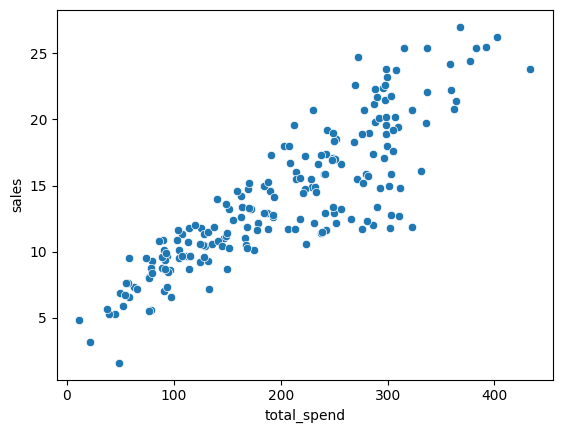

In [ ]:
# Simple linear regression lets draw a scatterplot
sns.scatterplot(data = df,x='total_spend',y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

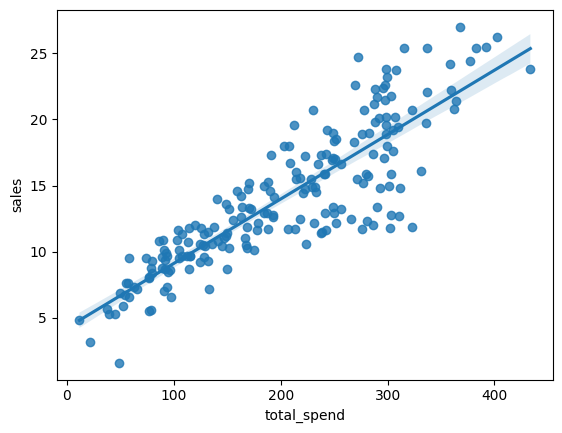

In [ ]:
# Simple linear regression lets draw a regplot
sns.regplot(data = df,x='total_spend',y='sales')

## Simple Linear Regression

In [ ]:
# Initialize the feature and label
X = df['total_spend']
y = df['sales']

In [ ]:
# Lets find the beta coefficient using the polyfit in numpy
# y = b1x + b0
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [ ]:
# Manually lets draw the regression line
potential_spend = np.linspace(0,500,100)
predicted_sales = (0.04868788*potential_spend) + 4.24302822

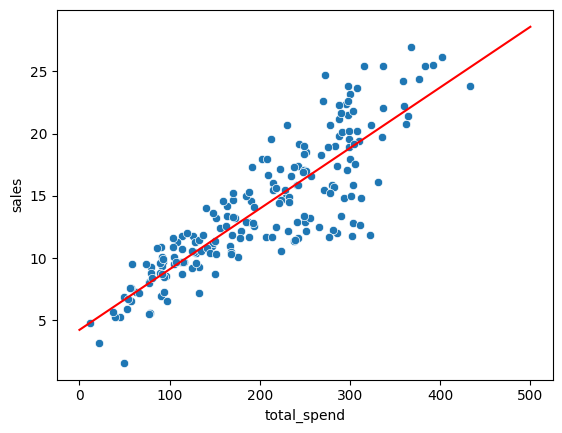

In [ ]:
# Draw a scatterplot along with the predicted_sales
sns.scatterplot(data = df,x='total_spend',y='sales')
plt.plot(potential_spend,predicted_sales,color='red')

In [ ]:
# Lets predict for total_spend = 200
spend = 200
predicted_sales = (0.04868788 * spend) + 4.24302822

In [ ]:
# Predict the sales
predicted_sales

13.98060422

## Simple Linear Regression for degree 3

In [ ]:
# Lets find the beta coefficient using the polyfit in numpy
# y = b3x^3 + b2x^2 + b1x + bo
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [ ]:
# Manually lets draw the regression line
pot_spend = np.linspace(0,500,100)
predict_sales = (3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend) + 2.70495053e+00

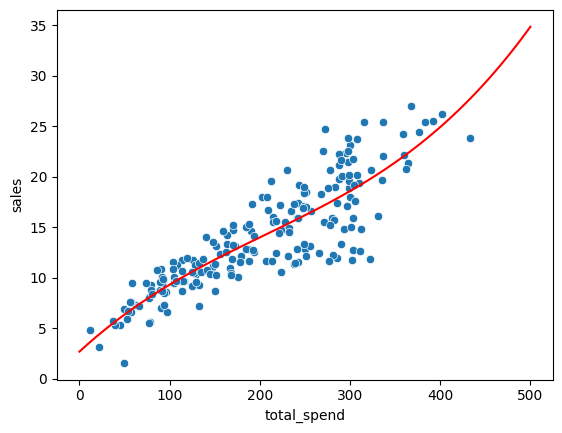

In [ ]:
# Draw a scatterplot along with the predicted_sales
sns.scatterplot(data = df,x='total_spend',y='sales')
plt.plot(pot_spend,predict_sales,color='red')

In [ ]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

# Sklearn - Scikit library

## Linear Regression for Mutiple Features

In [ ]:
# Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/CSV/Advertising - Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'newspaper spend')

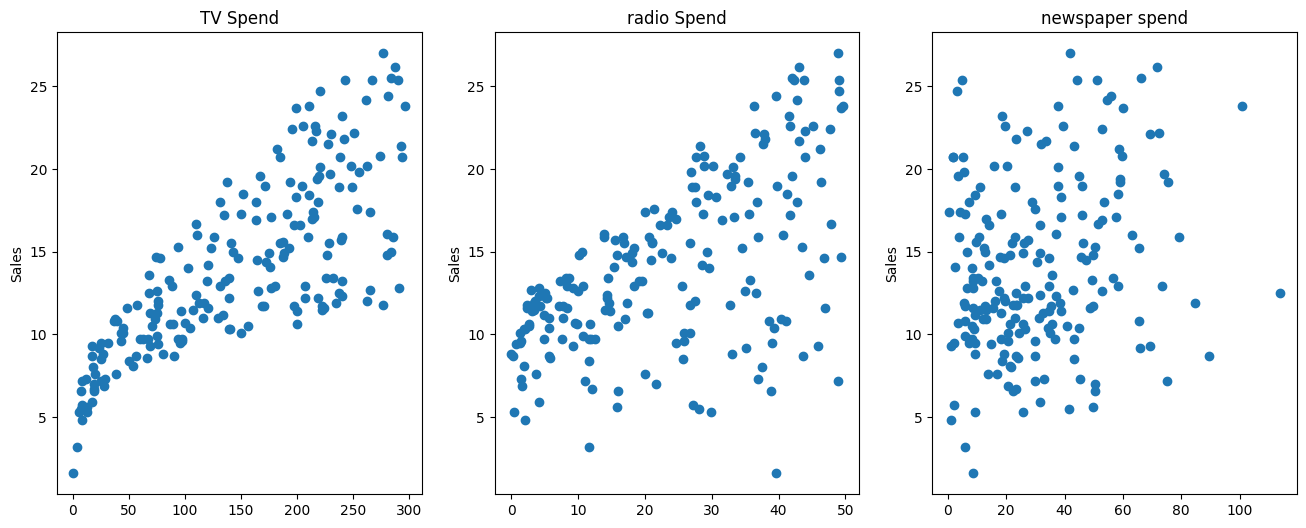

In [ ]:
# Create subplots
fig,axes = plt.subplots(nrows = 1,ncols = 3,figsize = (16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title('radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title('newspaper spend')

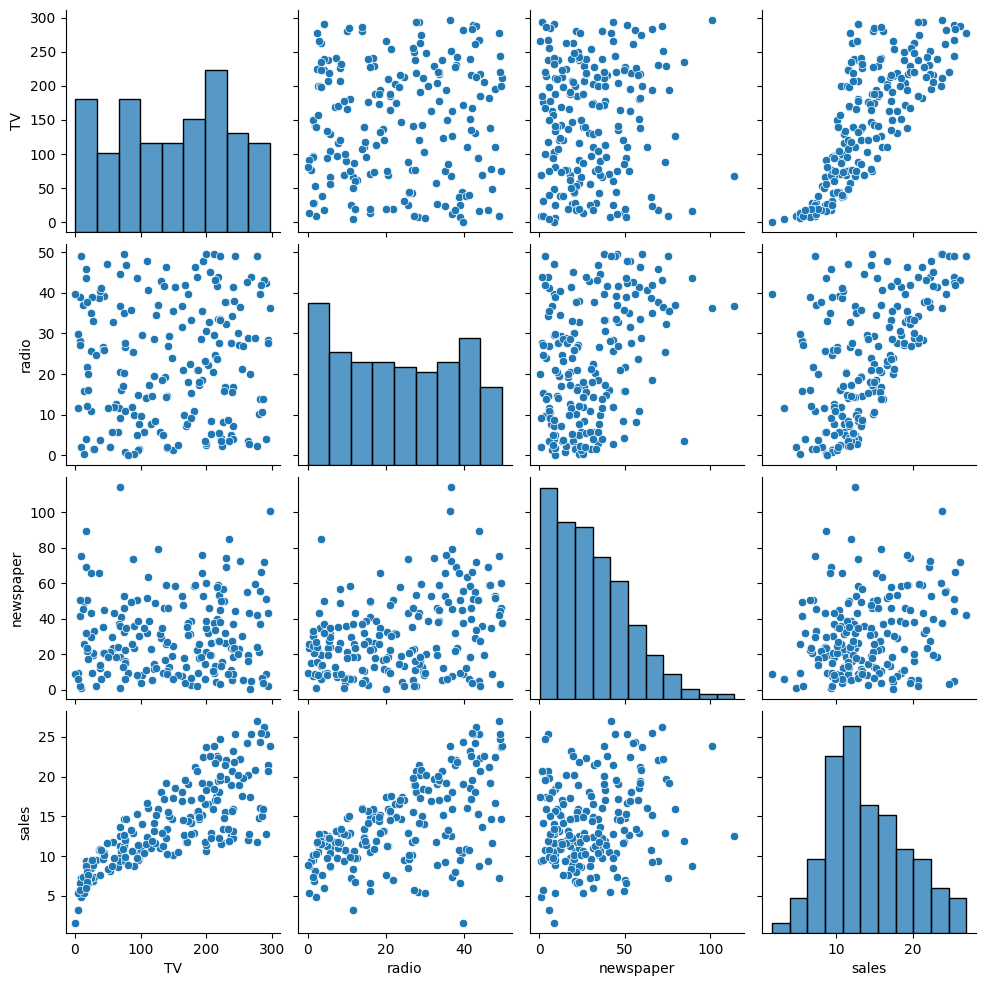

In [ ]:
# Create a pairplot() instead
sns.pairplot(df)

In [ ]:
# Create a feature vector and label for multiple feature
X = df.drop('sales',axis = 1)
y = df['sales']

In [ ]:
# Load the sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Help for syntax
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [ ]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Print the length of training data that is 70% of 200
len(X_train)

140

In [ ]:
# Print the length of test data that is 30% of 200
len(X_test)

60

In [ ]:
# Load the sklearn for model
from sklearn.linear_model import LinearRegression

In [ ]:
# Help
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [ ]:
# Create an instance of the LinearRegression() model
model = LinearRegression()

In [ ]:
# Help
help(LinearRegression().fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict the values for the test set
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Evaluating the Error

In [ ]:
# Load the library
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
# Predict the values for the test set
pred_sales = model.predict(X_test)
pred_sales

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [ ]:
# Find the mean of overall sales column
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

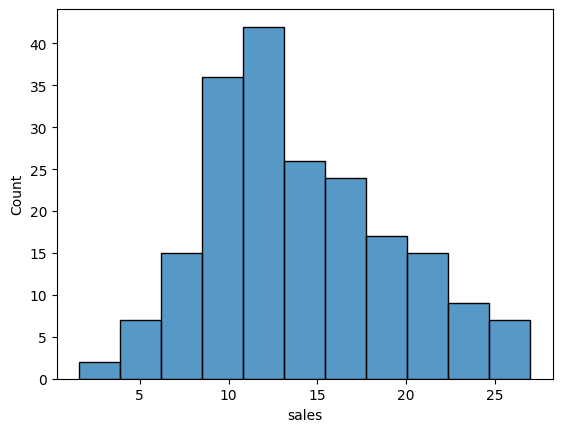

In [ ]:
# plot a histogram
sns.histplot(data = df,x='sales')

In [ ]:
# Evaluate the error in our model
# Y_test is the test label
# pred_sales is the predicted values we compare them to find error
mean_absolute_error(y_test,pred_sales)

1.213745773614481

In [ ]:
# using mean_squared_error
# gives variance
mean_squared_error(y_test,pred_sales)

2.2987166978863796

In [ ]:
# using mean_squared_error
# gives standard deviation
# comparing this to mean of data it has 10%
np.sqrt(mean_squared_error(y_test,pred_sales))

1.5161519375993884

## Residual Plot

In [ ]:
# find the residual errors
residual_error = y_test - pred_sales
residual_error

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

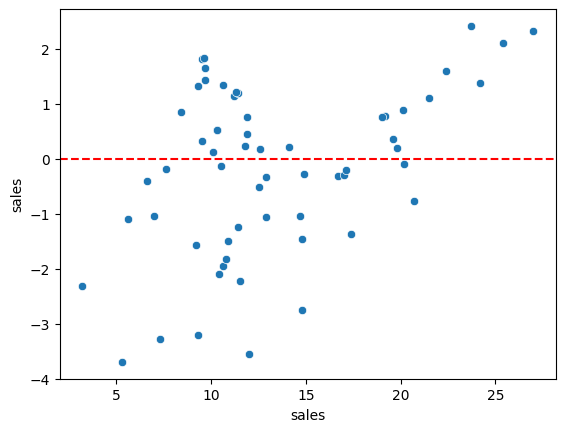

In [ ]:
# plot these residual errors in a scatterplot and form a residual plot
sns.scatterplot(x= y_test,y= residual_error)
plt.axhline(y=0,color='red',ls='--')

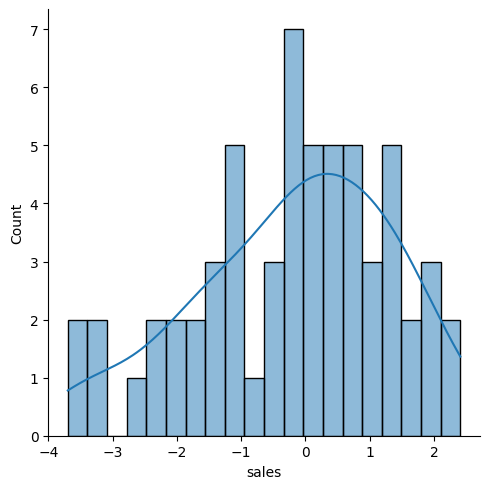

In [ ]:
# Create a displot
sns.displot(residual_error, kde=True,bins=20)

In [ ]:
# load scipy library
import scipy as sp

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-3.69806574, -3.55228966, -3.28105585, -3.20719678, -2.76285075,
         -2.30870279, -2.22541098, -

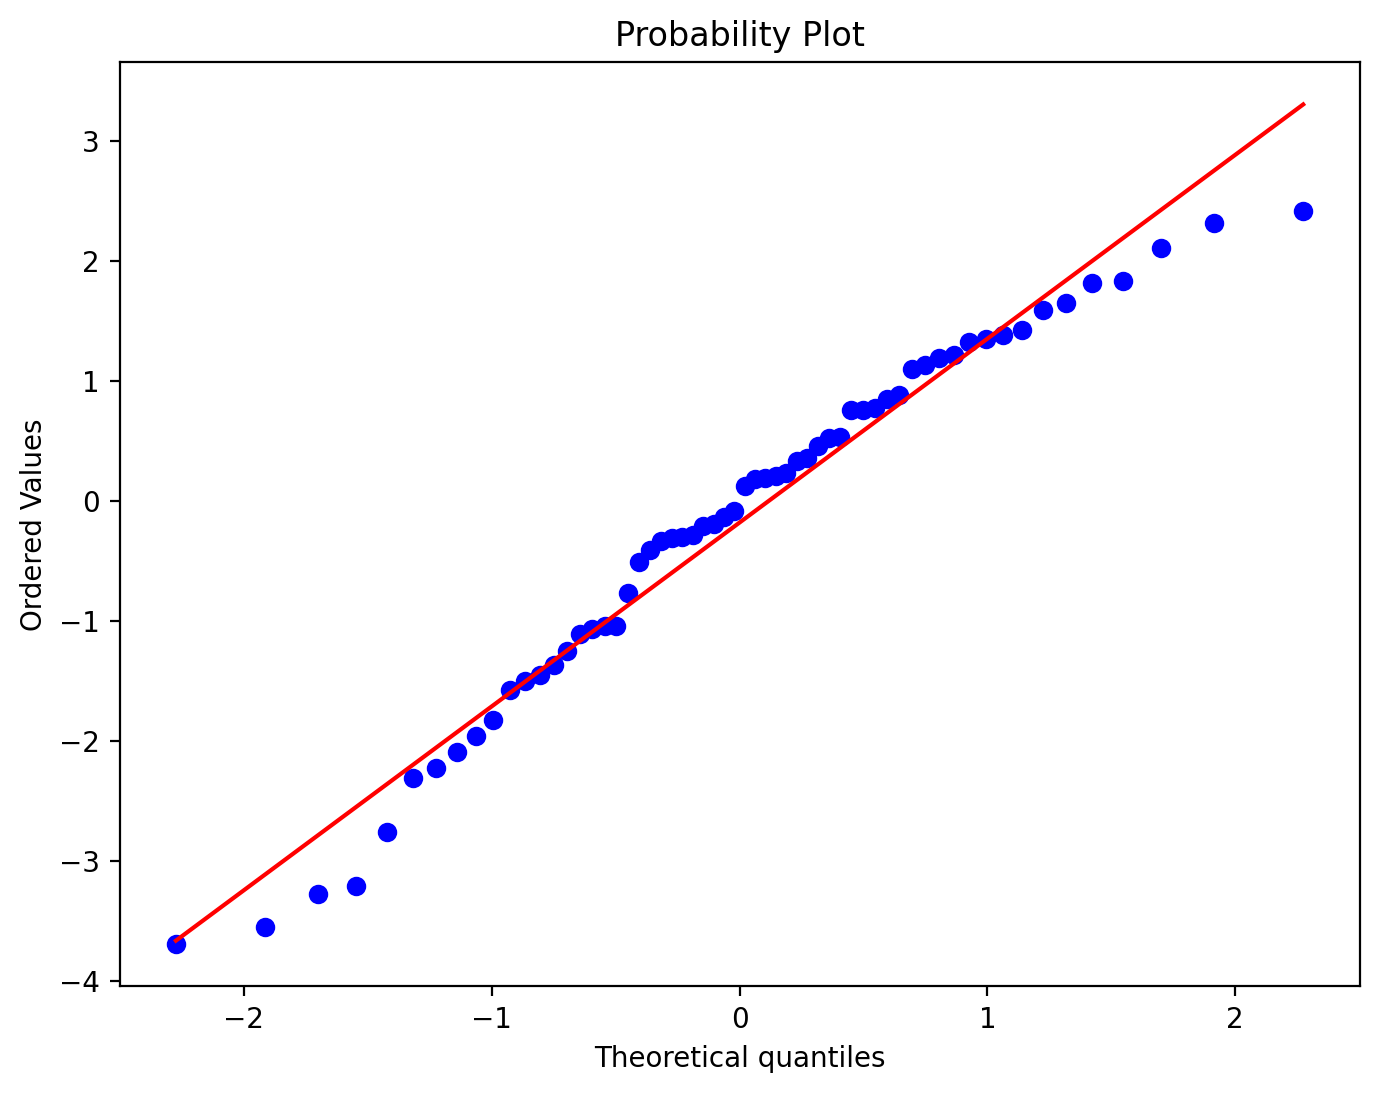

In [ ]:
# Plot a probability plot
fig,axes = plt.subplots(figsize=(8,6),dpi=200)
sp.stats.probplot(residual_error,plot = axes)

# Final Model

In [ ]:
# Create a final model
final_model = LinearRegression()

In [ ]:
# Train the Model
final_model.fit(X,y)

LinearRegression()

In [ ]:
# find the beta coefficient
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# print the feature vector
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
# find predicted value
y_hat = final_model.predict(X)

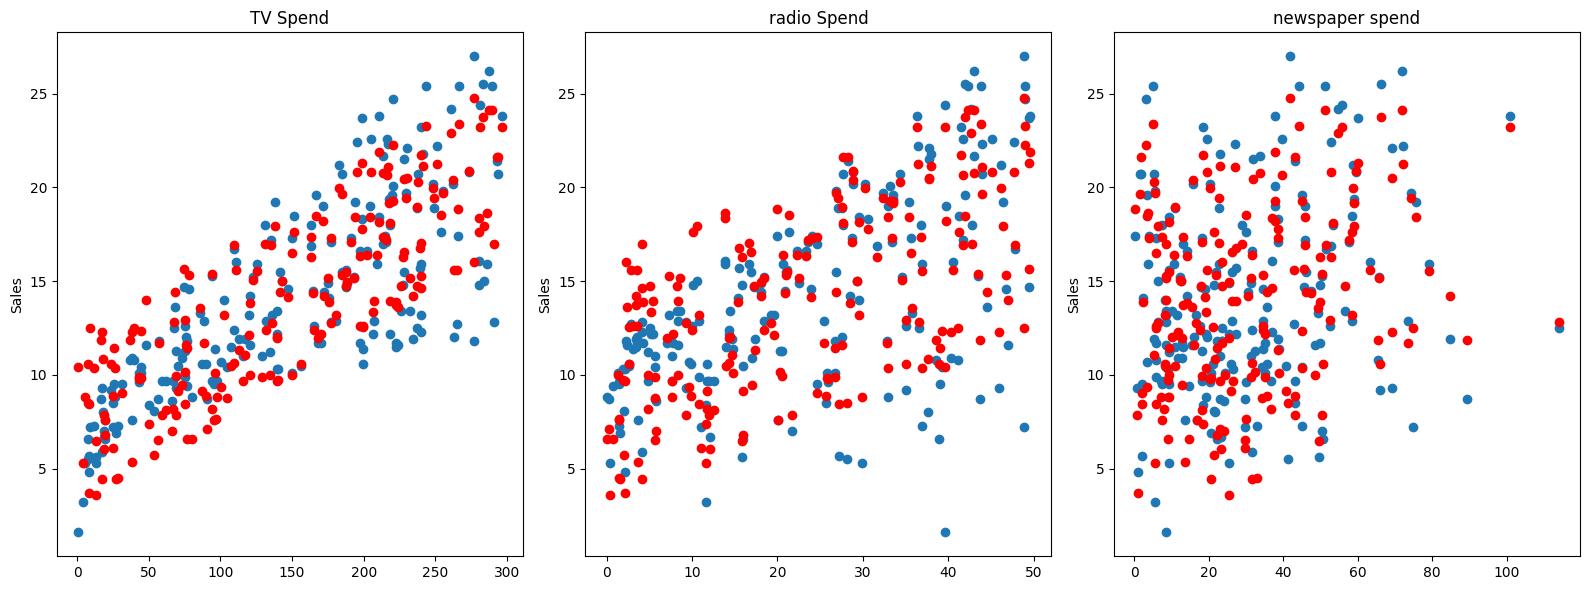

In [ ]:
# plot a subplot
fig,axes = plt.subplots(nrows = 1,ncols = 3,figsize = (16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('radio Spend')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('newspaper spend')
plt.tight_layout()

## Dump and Load

In [ ]:
# Load the library
from joblib import dump,load

In [ ]:
# Save or dump the model
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [ ]:
# load the final_sales_model
loaded_model = load('final_sales_model.joblib')

In [ ]:
# find the coef
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
# Check the shape
X.shape

(200, 3)

In [ ]:
# Create a data to predict
# 149 TV , 22 radio , 12 newspaper
data = [[149,22,12]]

In [ ]:
# predict for a unknown data
# 149 TV , 22 radio , 12 newspaper
loaded_model.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])